In [31]:
import torch
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
ds_mnist = MNIST(root="./",download=True,train= True)


## How MNIST distributed

In [51]:
dict_res = dict()
for i in list(ds_mnist.class_to_idx.values()):
    batch = ds_mnist.data[ds_mnist.targets==i].type(torch.float32)
    means = batch.reshape(batch.shape[0], -1).mean(dim=1)
    std = means.std()

    dict_res[i] = (means, std)
    

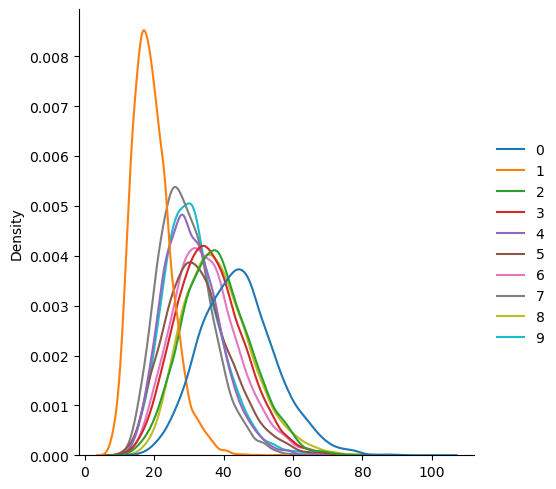

In [66]:
sns.displot(data=[dict_res[i][0].numpy() for i in list(dict_res.keys())], kind="kde")


<AxesSubplot:>

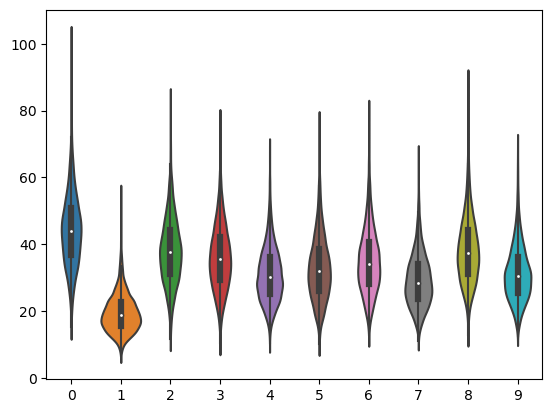

In [69]:
sns.violinplot(data=[dict_res[i][0].numpy() for i in list(dict_res.keys())])

## How Colors are distributed on each pixels

In [70]:
dict_res1 = dict()
for i in list(ds_mnist.class_to_idx.values()):
    batch = ds_mnist.data[ds_mnist.targets==i].type(torch.float32)
    means = batch.reshape(batch.shape[0], -1).mean(dim=0)
    std = means.std()

    dict_res1[i] = (means, std)

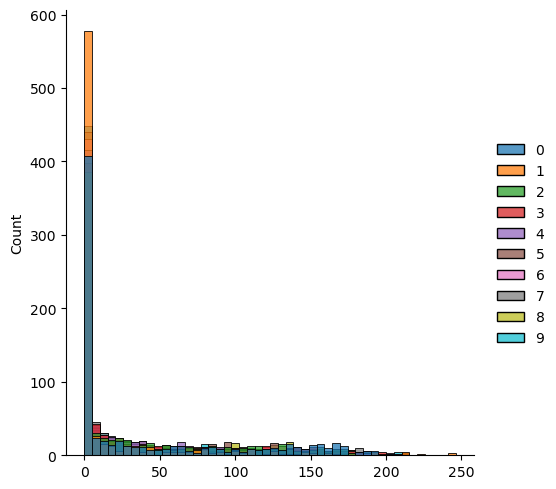

In [79]:
sns.displot(data=[dict_res1[i][0].numpy() for i in list(dict_res1.keys())])

<AxesSubplot:>

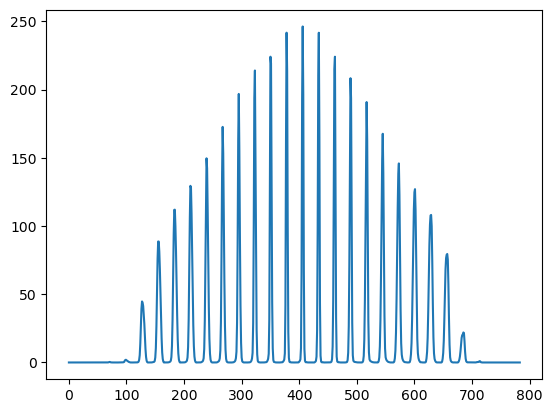

In [78]:
sns.lineplot( x=range(784), y=dict_res1[1][0])